In [1]:
### General
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.optimize import curve_fit
from tqdm import tqdm
import pandas as pd

### Query
from astroquery.sdss import SDSS
from astropy import coordinates as coords

# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install sdss

You should consider upgrading via the 'C:\Users\arsen\anaconda3\python.exe -m pip install --upgrade pip' command.


In [27]:
df = pd.read_csv("data/sdssdr14-wd-catalog/Table2.csv")

ps = []
ms = []
fs = []

for i in range(len(df['P-M-F'])):
    tpmf = df['P-M-F'][i].split('-')
        
    ps.append(int(tpmf[0]))
    ms.append(int(tpmf[1]))
    fs.append(int(tpmf[2]))
        
df['plate'] = ps
df['mjd'] = ms
df['fiber'] = fs

In [28]:
from astropy.coordinates import SkyCoord
from astropy import units as u

i = df['SNg'].tolist().index(max(df['SNg']))

xid = SDSS.get_spectra_async(plate=df['plate'][i], fiberID=df['fiber'][i], mjd=df['mjd'][i])
url = str(xid[0]).split(' ')[4]
print(url)

https://data.sdss.org/sas/dr14/sdss/spectro/redux/26/spectra/2682/spec-2682-54401-0422.fits


In [37]:
from astropy.io import fits
star = fits.open(url)https://data.sdss.org/sas/dr14/sdss/spectro/redux/26/spectra/2682/spec-2682-54401-0422.fits

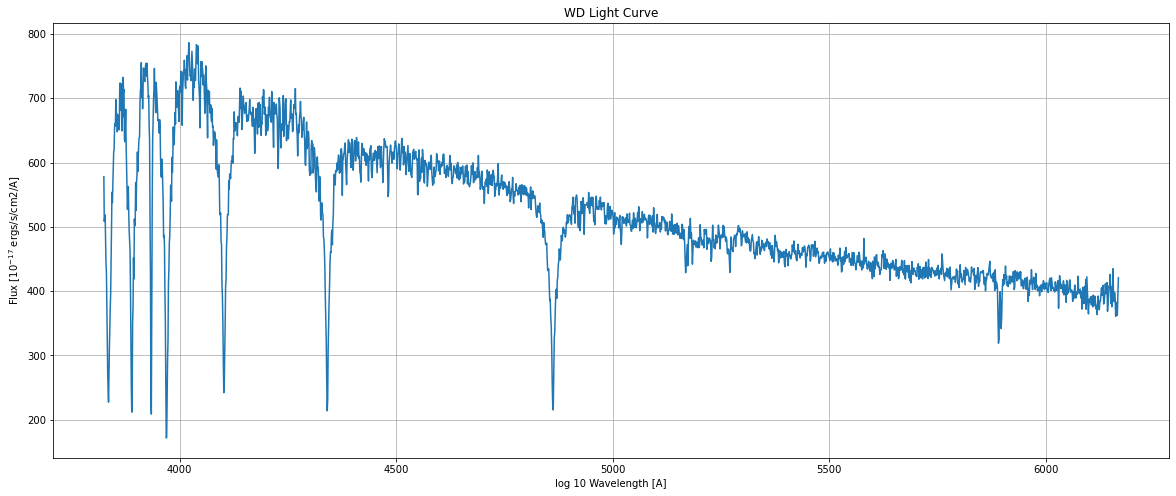

In [51]:
# https://www.sdss.org/dr17/spectro/spectro_basics/
# https://data.sdss.org/datamodel/files/SPECTRO_REDUX/RUN2D/PLATE4/spCFrame.html

header = star[5].header
data = star[5].data

plt.figure(figsize=(20,8))

plt.plot(10**data['loglam'], data['flux'])
plt.grid()
plt.ylabel(r'Flux [$10^{-17}$ ergs/s/cm2/A]')
plt.xlabel(r'Wavelength [A]')
plt.title('WD Light Curve')
ax = plt.gca()

plt.show()